## HW5 Assignment 1 
In this assignment we assess that the Z-test for a Poisson distribution with paramenter $ \lambda = 2 $ have a $ N(0,1) $ distribution

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


** Original Distribution **  
A Poisson with lambda=2 :

In [2]:
np.random.seed(910)

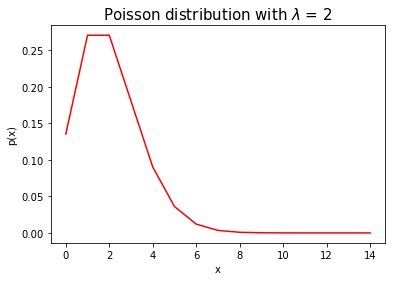

In [3]:
x = np.arange(0,15)
pl.plot(x, st.poisson.pmf(x, 2),"r");
pl.xlabel("x",fontsize=10);
pl.ylabel("p(x)",fontsize=10)
pl.title("Poisson distribution with $ \lambda $ = 2", fontsize=15)

** Figure 1 ** The distribution we will be working on: a Poisson with mean $\lambda=2$ 

Generate N Poisson distributions with $\lambda=2$

In [4]:
#in this example I set N=1000
N = np.arange(0,1000,1)
lamb = 2
myDist = {} 

In [5]:
for n in N:
    myDist[n] = st.poisson.rvs(lamb, size=10000)

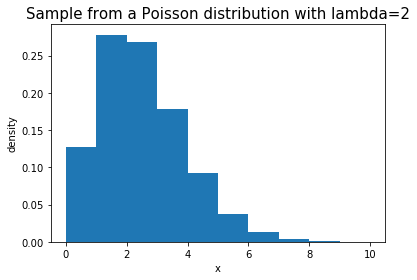

In [6]:
pl.hist(myDist[0],normed=True);
pl.xlabel("x",fontsize=10);
pl.ylabel("density",fontsize=10);
pl.title("Sample from a Poisson distribution with lambda={}".format(lamb),fontsize=15);

** Figure 2 ** The first one of the $N=1000 $ generated random poisson distributions with $ \lambda=2 $

In [7]:
def calculate_z(sample, mu, sigma):
    z = np.sqrt(len(sample))*(mu - sample.mean())/sigma
    return z

In [8]:
z = np.zeros(len(N))
for i in range(0,len(N)):
    z[i] = calculate_z(myDist[i],lamb,sqrt(lamb))

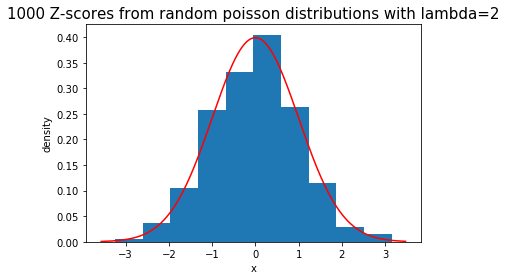

In [9]:
pl.hist(z,normed=True);
pl.xlabel("x",fontsize=10);
pl.ylabel("density",fontsize=10);
pl.title("{} Z-scores from random poisson distributions with lambda={}".format(len(N),lamb),fontsize=15);
xmin, xmax = pl.xlim()
x = np.linspace(xmin,xmax,1000)
p = st.norm.pdf(x,0,1)
plt.plot(x, p, 'r');

** Figure 3 **  The density of N  Z-scores with an overlying $N(0,1)$ curve. In the below test, I check with the K-S test if the two distributions are indeed equal. 

### How does the distribution of Z - scores compare to a $ N(0,1)$ ?

$H_0 $ : The Z-scores have a distribution that is equal to a Normal with mean=0 and std=1.  
Test at $ \alpha = 0.05 $

In [10]:
kstest = st.kstest(z, 'norm')

In [12]:
print("Dist of Z-scores vs Normal(0,1): ", kstest)

Dist of Z-scores vs Normal(0,1):  KstestResult(statistic=0.02414174793047108, pvalue=0.60461286079638066)


The K-S statistic for the test is ks=0.022, which corresponds to a p value of $ p=0.604 $.  
At an $ \alpha= 0.05 $ significance level we fail to reject the null hypothesis, and conclude that the Z-scores are distributes as a $ N(0,1) $

In [35]:
#CHI SQUARE TEST MINIMIZATION? NOT SURE I UNDERSTAND